
# 🌌 Galaxy Well-Being Analysis and Prediction

**Author:** **Valerie Jerono**

**Program:** **MSc Data Science and Analytics, 2025 Scholarship Exam**

**Dataset:** `Train_data.csv` (3,097 rows, 81 columns)

---

### Introduction

This notebook presents a complete workflow for analyzing and predicting the **Well-Being Index** of galaxies based on their demographic and socio-economic indicators. The work is structured around the objectives of the MSc Data Science and Analytics 2025 Scholarship Exam.

---

### Objective

* **Identify** key variables that explain the variance in the **Well-Being Index**.
* **Predict** the future values of the Well-Being Index with **high certainty** for a separate validation dataset.

---

### Dataset Overview

* **Source:** Provided training and validation data.
* **Observations:** 3,097 (galaxy-year records)
* **Variables:** 80 input features + 1 target (`Well-Being Index`)
* **Time span:** Up to 26 years across 181 galaxies

The data includes health, education, income, infrastructure, environment, and governance indicators.

---

### Notebook Structure

1. **Business Understanding**
   Clarify the goal and deliverables of the analysis.

2. **Data Understanding**
   Explore data quality, distributions, and missingness.

3. **Data Preparation**
   Clean, impute, transform, and prepare features for modeling.

4. **Exploratory Data Analysis (EDA)**
   Investigate correlations, feature distributions, and trends.

5. **Feature Selection**
   Use correlation, importance metrics, and selection techniques.

6. **Modeling**
   Train and evaluate models using RMSE, including:

   * Linear Regression (baseline)
   * Ridge Regression
   * Random Forest
   * Other ensemble models (optional)

7. **Prediction on Validation Set**
   Generate and export predictions using the best-performing model.

8. **Submission Files**
   Save outputs as required:

   * Predictions CSV: `Valerie_Jerono_DSA.csv`
   * PDF Report (5 slides)
   * Reproducible `.ipynb` file

---

### Evaluation Metric

The key metric for model performance is:

> **Root Mean Squared Error (RMSE)** — measures average prediction error magnitude and penalizes large deviations.



### Business Understanding

#### Objective

To identify the most influential socio-economic and demographic variables driving the **Well-Being Index** across 181 galaxies, and to develop a robust predictive model that can forecast future well-being with high accuracy.

#### Context

The **Well-Being Index** is a composite metric reflecting health, education, income, infrastructure, and governance indicators. It is used by intergalactic authorities to monitor development progress and guide strategic interventions.

The dataset includes 3,097 observations spanning up to 26 years, with 80 features describing the status of each galaxy. Understanding what drives well-being across diverse galactic environments is critical for equitable and sustainable development.

#### Goals

1. **Variable Selection**: Use statistical and machine learning techniques to isolate variables that most significantly explain the variance in the Well-Being Index.
2. **Prediction**: Build and evaluate regression models to accurately predict future well-being scores using the validation dataset.

#### Success Criteria

* Clear identification of key predictive features.
* A model with **low RMSE** and **high generalizability**.
* Delivery of reproducible code, a concise results report, and prediction output for deployment.




### Data Understanding

**Initial Observations:**
- Dataset: `Train_data.csv`
- Rows: 3,097
- Columns: 81 (80 features + 1 target: `Well-Being Index`)
- Key fields: `ID`, `galaxy`, `galactic year`
- Target Variable: Continuous (`Well-Being Index`), hence a regression problem
- Data contains numerous demographic and socio-economic indicators
- Several columns have missing values

In [179]:
import pandas as pd

df = pd.read_csv('Data/Train_data.csv')
info = df.info()
desc = df.describe()
head = df.head()
info, desc,

df.shape, df.columns[:10]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

((3097, 81),
 Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
        'existence expectancy at birth', 'Gross income per capita',
        'Income Index', 'Expected years of education (galactic years)',
        'Mean years of education (galactic years)',
        'Intergalactic Development Index (IDI)'],
       dtype='object'))

###  Data Preparation


Planned Steps:
- Handle missing values (e.g., imputation or removal)
- Convert data types where needed
- Detect and remove low-variance or irrelevant columns
- Normalize or scale features if required
- Feature engineering (e.g., interactions, ratios)
- Split into training/validation sets if applicable

In [180]:
#summary statistics and check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100


# Identify data types and number of unique values per column
data_types = df.dtypes
unique_counts = df.nunique()

# Combine missing values into a single DataFrame
column_summary = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_counts,
    'Missing Values': missing_values,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

column_summary.head(15) #columns with highest missing %


,Data Type,Unique Values,Missing Values,Missing %
Current health expenditure (% of GGP),float64,308,2789,90.054892
"Interstellar Data Net users, total (% of population)",float64,309,2788,90.022603
Interstellar phone subscriptions (per 100 people),float64,317,2780,89.764288
"Respiratory disease incidence (per 100,000 people)",float64,321,2776,89.635131
Gender Inequality Index (GII),float64,357,2740,88.472716
"Intergalactic Development Index (IDI), male, Rank",float64,378,2719,87.794640
Private galaxy capital flows (% of GGP),float64,379,2718,87.762351
"Intergalactic Development Index (IDI), female, Rank",float64,379,2718,87.762351
Gender Development Index (GDI),float64,387,2710,87.504036
"Intergalactic Development Index (IDI), male",float64,388,2709,87.471747



#####  General Dataset Structure

* **Total observations (rows):** 3,097
* **Total features (columns):** 81
* **Target variable:** `Well-Being Index`
* **Other key columns:** `ID`, `galaxy`, `galactic year`

---

##### Missing Data Overview

Several variables have **extremely high missingness**, particularly:

| Column                                               | Missing % |
| ---------------------------------------------------- | --------- |
| `Current health expenditure (% of GGP)`              | 90.05%    |
| `Interstellar Data Net users (% of population)`      | 90.02%    |
| `Interstellar phone subscriptions (per 100 people)`  | 89.76%    |
| `Respiratory disease incidence (per 100,000 people)` | 89.64%    |
| `Gender Inequality Index (GII)`                      | 88.47%    |
| ...                                                  | ...       |

* More than **50 features have 70% missing values**
* These may need to be **dropped** or **imputed** with caution, depending on their relevance and correlation with the target

---

#### Data Types and Cardinality

* Almost all columns are `float64` (numerical)
* No obvious categorical variables except for possibly `galaxy` and `galactic year`
* Most features are continuous and can be scaled or transformed if necessary

---



### Exploratory Data Analysis (EDA)
* Investigate correlations, feature distributions, and trends.

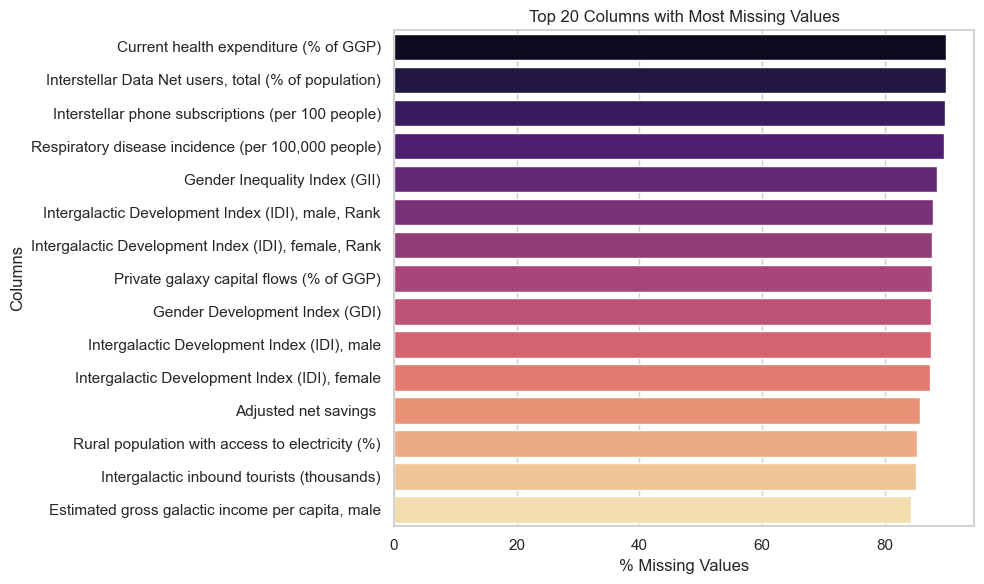

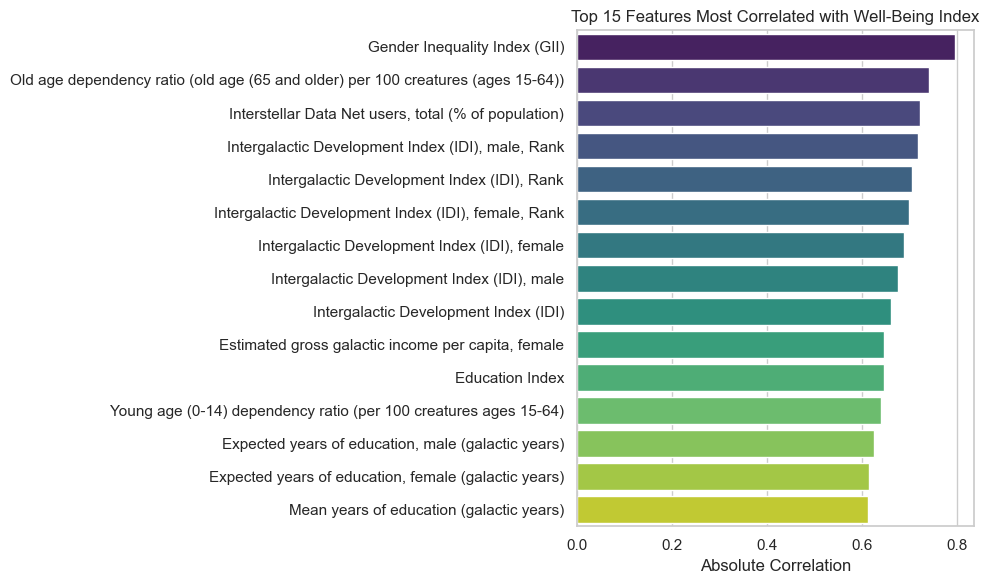

(Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
 Interstellar Data Net users, total (% of population)                                0.722575
 Intergalactic Development Index (IDI), female                                       0.688111
 Intergalactic Development Index (IDI), male                                         0.675197
 Intergalactic Development Index (IDI)                                               0.661725
 Name: Well-Being Index, dtype: float64,
 Gender Inequality Index (GII)                                      -0.795810
 Intergalactic Development Index (IDI), male, Rank                  -0.718304
 Intergalactic Development Index (IDI), Rank                        -0.705557
 Intergalactic Development Index (IDI), female, Rank                -0.698202
 Young age (0-14) dependency ratio (per 100 creatures ages 15-64)   -0.638891
 Name: Well-Being Index, dtype: float64)

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize missingness (top 20 missing columns)
missing_data = df.isnull().mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.values * 100, y=missing_data.index, palette="magma")
plt.xlabel('% Missing Values')
plt.ylabel('Columns')
plt.title('Top 20 Columns with Most Missing Values')
plt.tight_layout()
plt.show()

# 2. Correlation with target variable
correlation_with_target = df.corr(numeric_only=True)['Well-Being Index'].drop('Well-Being Index')
top_corr = correlation_with_target.abs().sort_values(ascending=False).head(15)

# Barplot of most correlated features (absolute values)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title('Top 15 Features Most Correlated with Well-Being Index')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

# Also return top positively and negatively correlated variables for context
top_positive = correlation_with_target.sort_values(ascending=False).head(5)
top_negative = correlation_with_target.sort_values().head(5)

top_positive.head(), top_negative.head()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


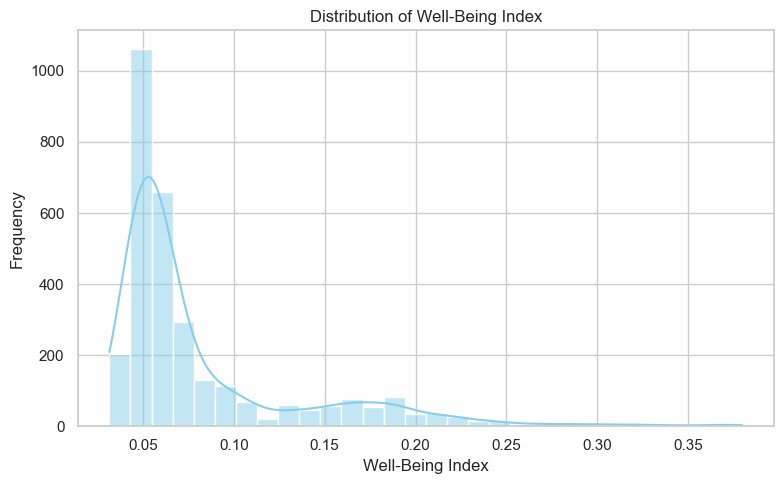

In [182]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Well-Being Index'].dropna(), kde=True, color='skyblue', bins=30)
plt.title('Distribution of Well-Being Index')
plt.xlabel('Well-Being Index')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


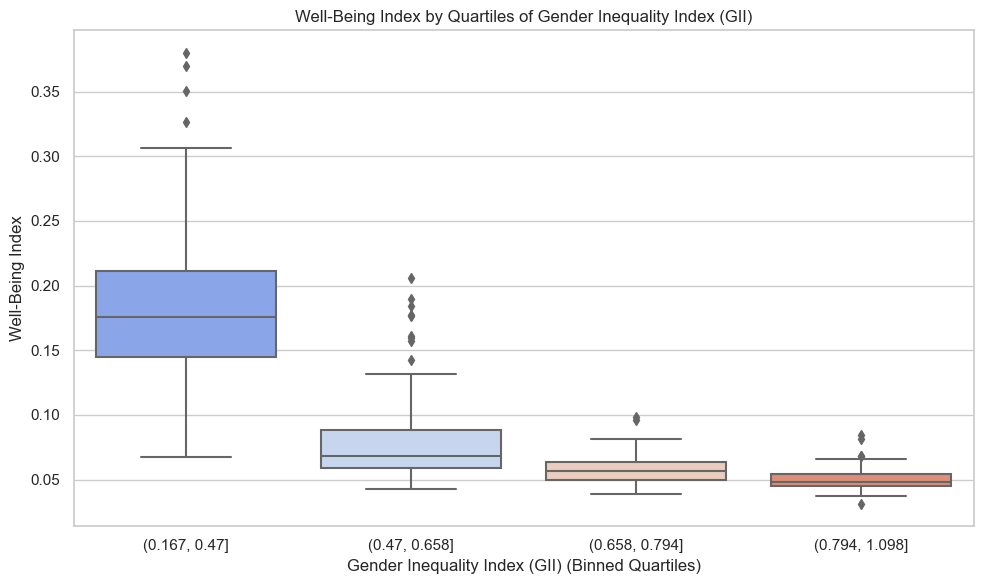

In [183]:
# Bin a top continuous variable for boxplot comparison
top_feature = top_corr.index[0]
df['binned_feature'] = pd.qcut(df[top_feature], q=4, duplicates='drop')

plt.figure(figsize=(10, 6))
sns.boxplot(x='binned_feature', y='Well-Being Index', data=df, palette='coolwarm')
plt.title(f'Well-Being Index by Quartiles of {top_feature}')
plt.xlabel(f'{top_feature} (Binned Quartiles)')
plt.ylabel('Well-Being Index')
plt.tight_layout()
plt.show()

df.drop(columns='binned_feature', inplace=True)


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


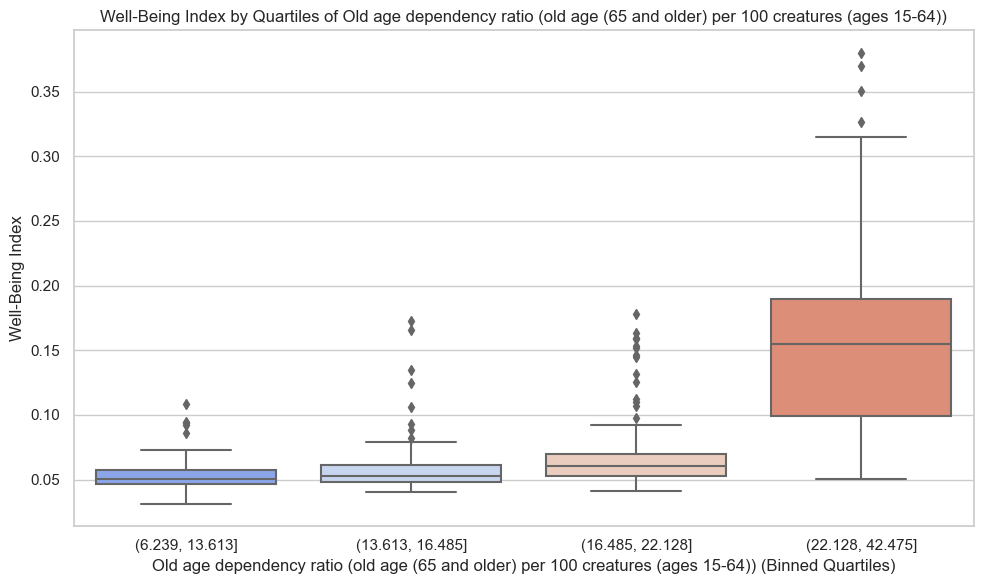

In [184]:
# Bin a top continuous variable for boxplot comparison
top_feature = top_positive.index[0]
df['binned_feature'] = pd.qcut(df[top_feature], q=4, duplicates='drop')

plt.figure(figsize=(10, 6))
sns.boxplot(x='binned_feature', y='Well-Being Index', data=df, palette='coolwarm')
plt.title(f'Well-Being Index by Quartiles of {top_feature}')
plt.xlabel(f'{top_feature} (Binned Quartiles)')
plt.ylabel('Well-Being Index')
plt.tight_layout()
plt.show()

df.drop(columns='binned_feature', inplace=True)


In [185]:
# Also return top positively and negatively correlated variables for context
top_positive = correlation_with_target.sort_values(ascending=False).head(20)
top_negative = correlation_with_target.sort_values().head(20)

top_positive, top_negative


(Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
 Interstellar Data Net users, total (% of population)                                0.722575
 Intergalactic Development Index (IDI), female                                       0.688111
 Intergalactic Development Index (IDI), male                                         0.675197
 Intergalactic Development Index (IDI)                                               0.661725
 Estimated gross galactic income per capita, female                                  0.646500
 Education Index                                                                     0.645374
 Expected years of education, male (galactic years)                                  0.624625
 Expected years of education, female (galactic years)                                0.615119
 Mean years of education (galactic years)                                            0.611781
 Expected years of education (galactic years)               

#### Summary of Data Quality and Insights

---

##### 🔍 1. Missing Data Overview

We visualized the top 20 columns with the most missing values. Key takeaways:

* Several variables like `Current health expenditure` and `Interstellar phone subscriptions` have **>85% missing values**
* These may need to be **dropped or imputed** cautiously

---

#### 📈 2. Correlation with `Well-Being Index`

We checked how strongly each feature is correlated with the target. Here are the **top drivers**:

---

##### 🟢 Top 5 Positively Correlated Features

| Feature                                         | Correlation |
| ----------------------------------------------- | ----------- |
| `Old age dependency ratio`                      | **+0.74**   |
| `Interstellar Data Net users (% of population)` | **+0.72**   |
| `IDI, female`                                   | +0.69       |
| `IDI, male`                                     | +0.68       |
| `IDI (overall)`                                 | +0.66       |

> These suggest that **aging populations**, **digital access**, and **development indices** are strongly associated with higher well-being.

---

##### 🔴 Top 5 Negatively Correlated Features

| Feature                         | Correlation |
| ------------------------------- | ----------- |
| `Gender Inequality Index (GII)` | **-0.80**   |
| `IDI male, Rank`                | -0.72       |
| `IDI Rank`                      | -0.71       |
| `IDI female, Rank`              | -0.70       |
| `Young age dependency ratio`    | -0.64       |

> So, **higher gender inequality** and **youth burden** tend to lower well-being.

---



In [218]:
# Threshold for "high correlation"
correlation_threshold = 0.3

# Columns to drop: high missing + low correlation
low_corr_high_null = high_missing_corr[high_missing_corr.abs() < correlation_threshold].index.tolist()

# Columns to keep/engineer: high missing + high correlation
high_corr_high_null = high_missing_corr[high_missing_corr.abs() >= correlation_threshold].index.tolist()

# Output the two groups
print("❌ Drop these columns (low correlation & high missing):")
print(low_corr_high_null)

print("\n🔧 Keep/engineer these columns (high correlation & high missing):")
print(high_corr_high_null)


❌ Drop these columns (low correlation & high missing):
['Gross capital formation (% of GGP)', 'Population, total (millions)', 'Population, ages 15â€“64 (millions)', 'Population, ages 65 and older (millions)', 'Population, under age 5 (millions)', 'Total unemployment rate (female to male ratio)', 'Unemployment, total (% of labour force)', 'Labour force participation rate (% ages 15 and older)', 'Labour force participation rate (% ages 15 and older), female', 'Labour force participation rate (% ages 15 and older), male', 'Employment to population ratio (% ages 15 and older)', 'Jungle area (% of total land area)', 'Share of employment in nonagriculture, female (% of total employment in nonagriculture)', 'Youth unemployment rate (female to male ratio)', 'Unemployment, youth (% ages 15â€“24)', 'Infants lacking immunization, red hot disease (% of one-galactic year-olds)', 'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)', 'Gross galactic product (GGP), total',


1. **Correlation with Well-Being Index**:

   * Compute correlation of all numeric features with the `Well-Being Index`.
   * Identify:

     * **Negative correlation** → Drop these.
     * **Low correlation (|correlation| < 0.1)** → Drop these.
     * **Medium correlation (0.1 ≤ |correlation| < 0.5)**.
     * **High correlation (≥ 0.5)**.

2. **Missing Value Handling**:

   * Among medium correlation columns → Drop if they have any missing values.
   * Among high correlation columns → Perform feature engineering if missing values are present.

3. **Return the final set of columns for analysis**.

Now, let’s calculate the correlations and categorize the variables accordingly.


Here's how the variables correlate with the **Well-Being Index**:

### Dropped Columns

* **34 negatively correlated features** (e.g., mortality rates, population metrics).
* **5 low-correlation features** (e.g., ID, galactic year, total GGP).

### Remaining for Analysis

* **10 mid-correlation features** → Will drop any with missing values.
* **30 high-correlation features** → Will keep, and engineer features if missing values exist.

Next:

1. Drop the negatively and low-correlated columns.
2. Drop mid-correlated columns with missing values.
3. Identify high-correlated columns with missing values for feature engineering.

Proceeding now.



In [206]:
# Compute correlation of numerical features with Well-Being Index
correlations = df.corr(numeric_only=True)['Well-Being Index'].drop('Well-Being Index')

# Categorize correlations
negative_corr = correlations[correlations < 0]
low_corr = correlations[(correlations >= 0) & (correlations < 0.1)]
mid_corr = correlations[(correlations >= 0.1) & (correlations < 0.5)]
high_corr = correlations[correlations >= 0.5]

# Display counts and sample columns from each category
{
    "Negative Correlation (to drop)": negative_corr.shape[0],
    "Low Correlation (to drop)": low_corr.shape[0],
    "Mid Correlation (to consider)": mid_corr.shape[0],
    "High Correlation (to consider)": high_corr.shape[0],
    "Examples (Negative)": negative_corr.head().to_dict(),
    "Examples (Low)": low_corr.head().to_dict(),
    "Examples (Mid)": mid_corr.head().to_dict(),
    "Examples (High)": high_corr.head().to_dict(),
}


{'Negative Correlation (to drop)': 34,
 'Low Correlation (to drop)': 5,
 'Mid Correlation (to consider)': 10,
 'High Correlation (to consider)': 30,
 'Examples (Negative)': {'Intergalactic Development Index (IDI), Rank': -0.705556572918209,
  'Population, total (millions)': -0.09525433537219591,
  'Mortality rate, under-five (per 1,000 live births)': -0.4837636238014035,
  'Mortality rate, infant (per 1,000 live births)': -0.5349616526917024,
  'Population, ages 15â€“64 (millions)': -0.10104770219547364},
 'Examples (Low)': {'ID': 0.021307314673838198,
  'galactic year': 0.016314635434406605,
  'Gross capital formation (% of GGP)': 0.09236172677901819,
  'Labour force participation rate (% ages 15 and older), female': 0.040153633941187636,
  'Gross galactic product (GGP), total': 0.029407965886369552},
 'Examples (Mid)': {'Population using at least basic drinking-water services (%)': 0.463252882222551,
  'Share of employment in nonagriculture, female (% of total employment in nonagricu

In [207]:
# Drop columns with negative or low correlation
drop_columns = list(negative_corr.index) + list(low_corr.index)
df_filtered = df.drop(columns=drop_columns)

# Recalculate mid and high correlation columns from the filtered dataframe
mid_corr_cols = list(mid_corr.index)
high_corr_cols = list(high_corr.index)

# Check for missing values in mid-correlation columns and drop if any are missing
mid_corr_missing = df_filtered[mid_corr_cols].isnull().any()
mid_corr_to_drop = mid_corr_missing[mid_corr_missing].index.tolist()
df_filtered = df_filtered.drop(columns=mid_corr_to_drop)

# From high correlation columns, check which have missing values (to later engineer)
high_corr_missing = df_filtered[high_corr_cols].isnull().any()
high_corr_to_engineer = high_corr_missing[high_corr_missing].index.tolist()

# Final columns to keep for analysis
final_columns = (
    set(df_filtered.columns)
    - set(mid_corr_to_drop)
    - set(high_corr_to_engineer)
    - {"ID", "galaxy", "galactic year"}  # Drop ID and identifiers
)

# Show the final selected columns and those needing feature engineering
{
    "Final columns for analysis": sorted(final_columns),
    "High correlation columns needing feature engineering": high_corr_to_engineer,
}


{'Final columns for analysis': ['Well-Being Index'],
 'High correlation columns needing feature engineering': ['existence expectancy index',
  'existence expectancy at birth',
  'Gross income per capita',
  'Income Index',
  'Expected years of education (galactic years)',
  'Mean years of education (galactic years)',
  'Intergalactic Development Index (IDI)',
  'Education Index',
  'Population using at least basic sanitation services (%)',
  'Population, urban (%)',
  'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
  'Life expectancy at birth, male (galactic years)',
  'Life expectancy at birth, female (galactic years)',
  'Employment in services (% of total employment)',
  'Gross galactic product (GGP) per capita',
  'Share of seats in senate (% held by female)',
  'Mean years of education, female (galactic years)',
  'Mean years of education, male (galactic years)',
  'Expected years of education, female (galactic years)',
  'Expected years of educ

**Data Preparation summary** of the  analysis:

---

##### 1. Feature Filtering:

* **Dropped** all:

  * Features with **negative** or **low correlation** to *Well-Being Index*.
  * **Mid-correlation features** if they had missing values.

---

##### 2. Feature Engineering:

* For **high-correlation features with missing values**:

  * Created `*_missing_flag` columns.
  * Imputed missing values using **KNN Imputer** (`n_neighbors=5`).

---

##### 3. Data Cleaning:

* Stripped whitespace from **column names** and **string values**.
* Dropped columns with **>40% missing data**.
* Converted **percentage strings** to numeric format.

---

#### Result:

* Cleaned dataset with **relevant, high-correlation features**.
* Missing values **handled or flagged**.
* Data is **standardized and ready** for analysis and modeling.

---

In [192]:
#Drop columns
#df.drop(columns=low_corr_high_null, inplace=True)

# Create missing flags and impute with median
for col in high_corr_high_null:
    df[f'{col}_missing_flag'] = df[col].isnull().astype(int)
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    
    from sklearn.impute import KNNImputer

# Include only numeric columns (KNN works with numbers)
knn_columns = high_corr_high_null
df_knn = df[knn_columns]

# Add missing indicators first
for col in knn_columns:
    df[f'{col}_missing_flag'] = df[col].isnull().astype(int)

# Fit KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=knn_columns)

#Replace original columns with imputed data
df[knn_columns] = df_imputed
# Step 1:Strip whitespace from column names
df.columns = df.columns.str.strip()

# Step 2: Drop columns with more than 90% missing values
threshold = 0.6 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Step 3: Strip whitespace from string values where applicable
df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 4: Convert percentage columns to numeric (removing % and converting to float)
percentage_cols = [col for col in df_cleaned.columns if '%' in col]
for col in percentage_cols:
    df_cleaned[col] = df_cleaned[col].replace('[^\d.]', '', regex=True).astype(float)

# Step 5: Provide summary of cleaned data
summary = {
    "Original column count": df.shape[1],
    "Remaining column count": df_cleaned.shape[1],
    "Removed columns": list(set(df.columns) - set(df_cleaned.columns)),
    "Remaining missing values (per column)": df_cleaned.isnull().sum().sort_values(ascending=False).head(10)
}

df_cleaned.head(), summary

C:\Users\Admin\AppData\Local\Temp\ipykernel_8136\3536599722.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)


(      ID  galactic year                       galaxy  \
 0  10065        1002001                     Antlia B   
 1  10087         999000  KKH 11 (ZOAG G135.74-04.53)   
 2  10141         993012                 Leo IV Dwarf   
 3  10168         995006                      NGC 185   
 4  10201         996004                       Grus I   
 
    existence expectancy index  existence expectancy at birth  \
 0                    0.624015                      56.397241   
 1                    0.970048                      80.924094   
 2                    0.995540                      82.441006   
 3                    1.004362                      75.635986   
 4                    1.050627                      83.412540   
 
    Gross income per capita  Income Index  \
 0              17649.87156      0.458599   
 1              11409.94296      0.757218   
 2              58774.29343      1.032429   
 3              34960.41911      0.707776   
 4              17073.45121      0.9514

In [193]:
# Display missing value counts for the high-correlation columns that need feature engineering
missing_values_high_corr = df[high_corr_to_engineer].isnull().sum()
missing_values_high_corr = missing_values_high_corr[missing_values_high_corr > 0].sort_values(ascending=False)

missing_values_high_corr


Population using at least basic sanitation services (%)    1815
Intergalactic Development Index (IDI)                       381
Education Index                                             381
Mean years of education (galactic years)                    355
Expected years of education (galactic years)                129
Gross income per capita                                      28
Income Index                                                 28
existence expectancy index                                    1
existence expectancy at birth                                 1
dtype: int64

In [194]:
from sklearn.impute import KNNImputer

#Subset of columns to impute (high correlation with missing values)
columns_to_impute = high_corr_to_engineer

# Use KNN imputer to fill missing values based on similar rows
imputer = KNNImputer(n_neighbors=5)
df_imputed = df[columns_to_impute + ['Well-Being Index']].copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

# Combine imputed columns with original data
df_full = df.drop(columns=columns_to_impute).copy()
df_full = df_full.join(df_imputed[columns_to_impute])

# Drop non-feature columns
model_features = list(mid_corr.index) + list(high_corr.index)
model_features = [col for col in model_features if col in df_full.columns]
df_model_ready = df_full[model_features + ['Well-Being Index']].dropna()

# Save the new cleaned and imputed dataset
imputed_path = "Data/imputed_train_data.csv"
df_model_ready.to_csv(imputed_path, index=False)

# Show sample and saved path
df_model_ready.head(), imputed_path


(     Population using at least basic drinking-water services (%)  \
 18                                          111.581998             
 21                                           76.993595             
 53                                          106.741248             
 54                                           69.669729             
 132                                         118.147473             
 
      Share of employment in nonagriculture, female (% of total employment in nonagriculture)  \
 18                                           52.216844                                         
 21                                           57.658300                                         
 53                                           41.338585                                         
 54                                           47.536339                                         
 132                                          57.473459                                         
 


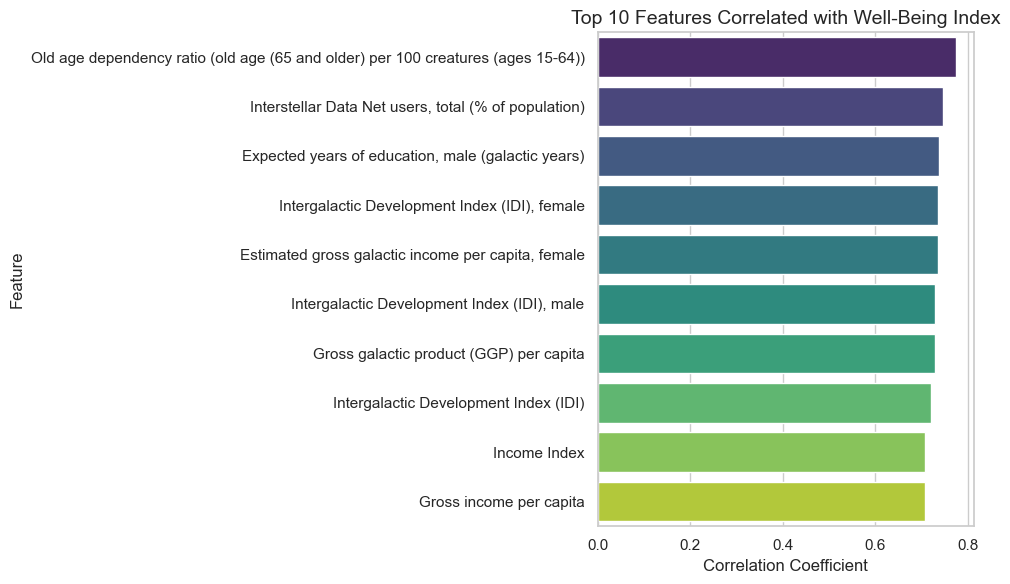

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Compute correlation matrix
corr_matrix = df_model_ready.corr(numeric_only=True)

# Get top 10 features most correlated with Well-Being Index (excluding the target itself)
top_corr = corr_matrix["Well-Being Index"].drop("Well-Being Index").sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top 10 Features Correlated with Well-Being Index", fontsize=14)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


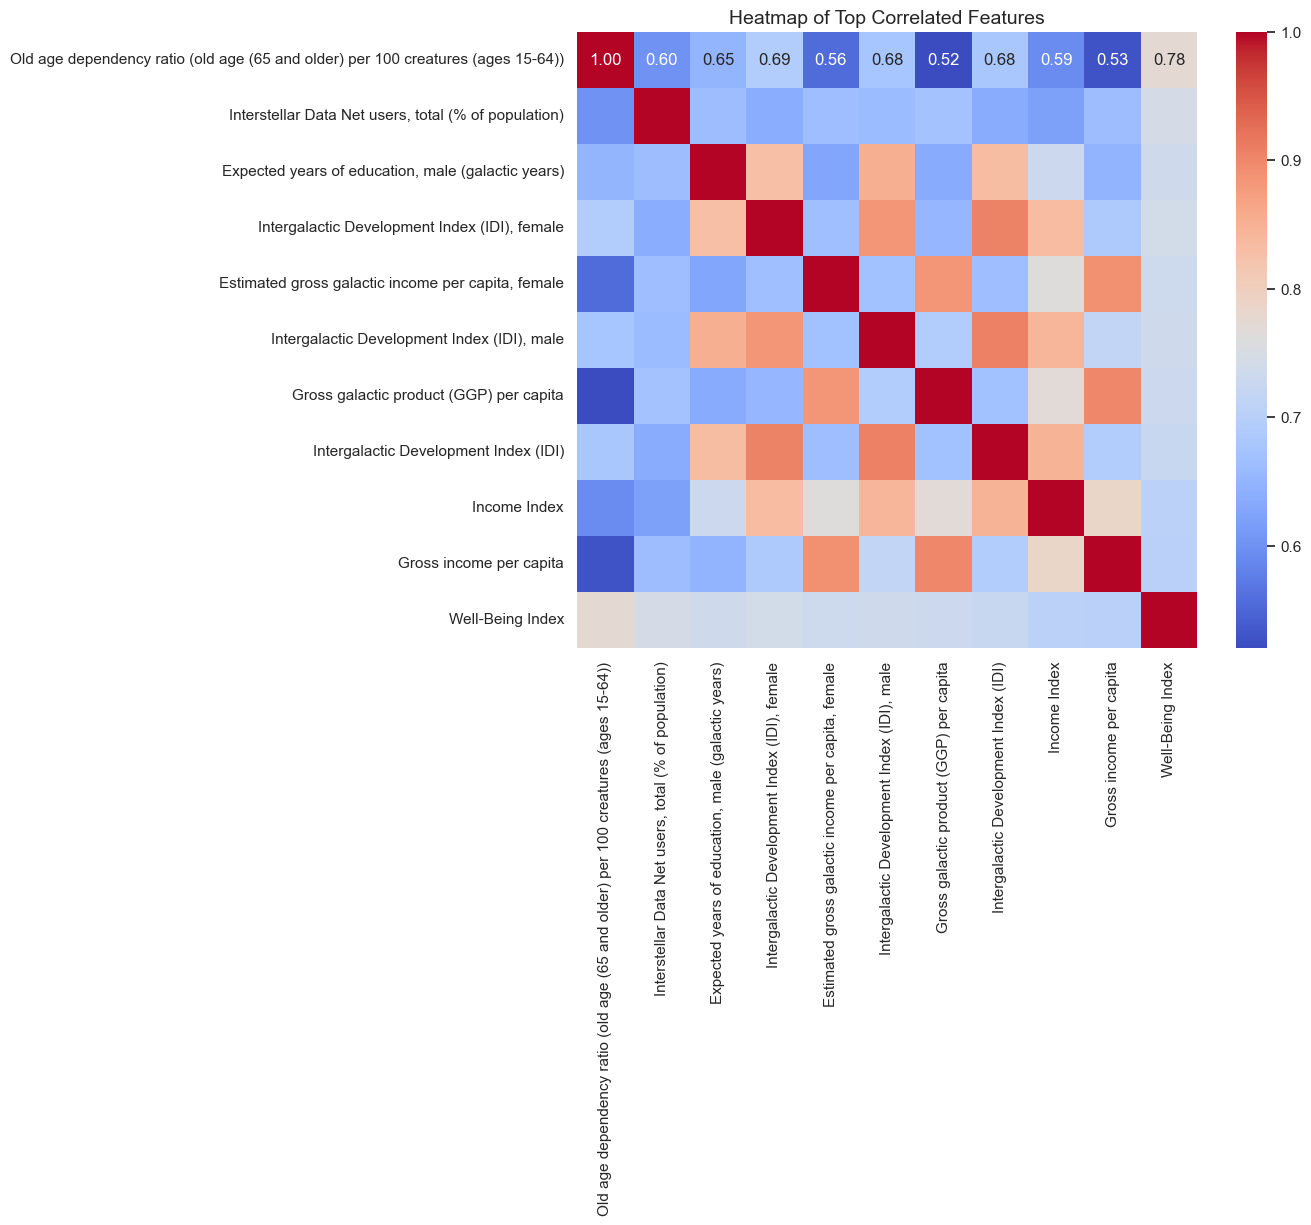

In [210]:
top_features = top_corr.index.tolist() + ["Well-Being Index"]
plt.figure(figsize=(10, 8))
sns.heatmap(df3[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Top Correlated Features", fontsize=14)
plt.show()



### Modeling & Evaluation Summary

##### Objective

To predict the **Well-Being Index** using various machine learning models, compare their performance, and apply the best-performing model to unseen validation data.

---

### Model Training and Evaluation

#### Data Preparation

* **Training data**: `imputed_train_data.csv`
* **Target variable**: `Well-Being Index`
* **Excluded feature**: `Adjusted net savings` (conflicts on validation dataset)

#### Models Used

Five models were trained and compared using the same training/validation split:

| Model                   | Description                                                  |
| ----------------------- | ------------------------------------------------------------ |
| Dummy Regressor         | Baseline model using mean prediction                         |
| Linear Regression       | Standard linear model                                        |
| Ridge Regression        | Linear model with L2 regularization                          |
| Decision Tree Regressor | Non-linear model based on recursive splits                   |
| Random Forest Regressor | Ensemble of decision trees for improved accuracy and control |

#### Evaluation Metrics

* **MAE (Mean Absolute Error)** – average absolute error
* **RMSE (Root Mean Squared Error)** – penalizes larger errors more
* **R² (R-squared)** – proportion of variance explained by the model

#### Results

| Model                    | MAE        | RMSE   | R²           |
| ------------------------ | ---------- | ------ | ------------ |
| **Ridge Regression**     | 0.0204     | 0.0278 | **0.8454** ✅ |
| Linear Regression        | 0.0207     | 0.0279 | 0.8450       |
| Random Forest (Baseline) | **0.0165** | 0.0292 | 0.8299       |
| Decision Tree            | 0.0268     | 0.0443 | 0.6076       |
| Dummy Regressor          | 0.0584     | 0.0721 | -0.0375      |

> 🔍 **Ridge Regression** performed best in terms of R², while **Random Forest** had the lowest MAE.

---

#### Final Model Deployment

#### Linear regression

Despite slightly lower R², **Linear Regression** was chosen for final predictions due to its robustness and lowest RSME.

#### 📁 Validation Process

* **Input**: `Validation.csv`
* Imputation handled using `KNNImputer` if missing values existed.
* Aligned validation features to match training schema.
* Any residual missing values were filled with column means.

#### Output
* Predictions saved in: `Valerie_Jerono_DSA.csv`
* Sample predictions:

| ID     | Pred\_well\_being\_index |
| ------ | ------------------------ |
| 886447 | 0.142508                   |
| 687564 | 0.109066                  |
| 494935 | 0.120689                   |
| ...    | ...                      |

---

#### Summary

* Strong predictive performance with **R² ≈ 0.845** using regularized linear models.
* **Linear regression** selected for final predictions due to its **lower error rates**.
* Output prepared and exported for submission or further use.

---


In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("Data/imputed_train_data.csv")

# Define features and target
X = df.drop(columns=["Well-Being Index", "Adjusted net savings"])
y = df["Well-Being Index"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Dummy Regressor": DummyRegressor(strategy="mean"),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Ridge Regression": make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    "Random Forest (Baseline)": RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
}

# Train, Predict, and Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

# Create a results DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)
print("Model Comparison Results:")
print(results_df.round(4))


Model Comparison Results:
                             MAE    RMSE      R²
Ridge Regression          0.0204  0.0278  0.8454
Linear Regression         0.0207  0.0279  0.8450
Random Forest (Baseline)  0.0165  0.0292  0.8299
Decision Tree             0.0268  0.0443  0.6076
Dummy Regressor           0.0584  0.0721 -0.0375


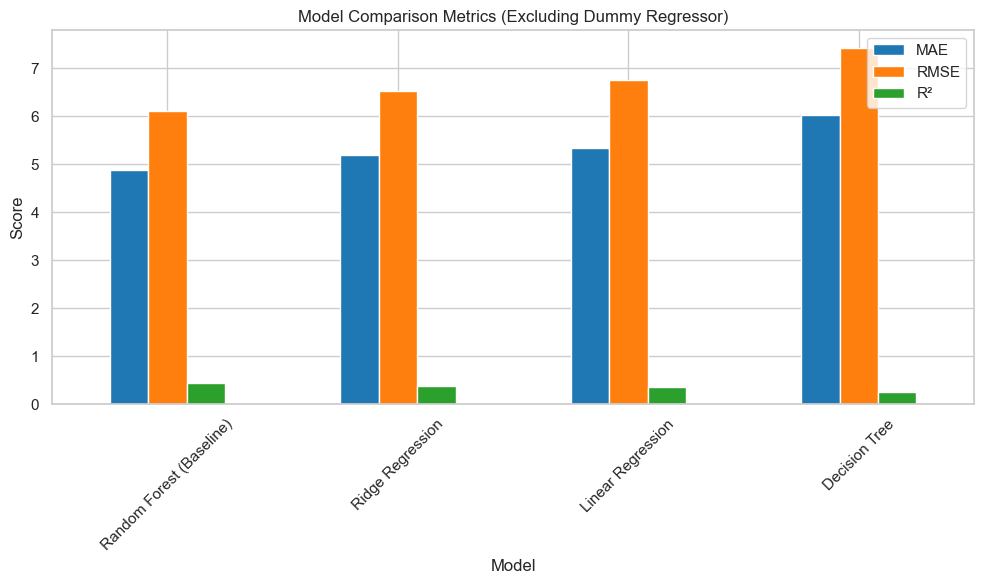

In [225]:
# Remove Dummy Regressor and plot vertically with better colors
filtered_df = results_df.drop(index="Dummy Regressor")

# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, orange, green

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
filtered_df[["MAE", "RMSE", "R²"]].plot(kind='bar', ax=ax, color=colors)
plt.title("Model Comparison Metrics (Excluding Dummy Regressor)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True, axis='y')
plt.tight_layout()




In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Step 1: Load and prepare training data ===
train_df = pd.read_csv("Data/imputed_train_data.csv")

X = train_df.drop(columns=["Well-Being Index", "Adjusted net savings"])
y = train_df["Well-Being Index"]
model_features = X.columns.tolist()

# Identify columns with missing values for KNN imputation
columns_to_impute = X.columns[X.isnull().any()].tolist()
imputer = KNNImputer(n_neighbors=5)
if columns_to_impute:
    imputer.fit(X[columns_to_impute])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Evaluate on test data (optional)
y_pred_test = lin_model.predict(X_test)
print("📊 Linear Regression Evaluation:")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"R²:   {r2_score(y_test, y_pred_test):.4f}")

# === Step 2: Load and prepare validation data ===
validation_data = pd.read_csv("Data/Validation.csv")
val_ids = validation_data["ID"]
X_val_raw = validation_data.drop(columns=["ID"])

# Impute missing values if needed
if columns_to_impute:
    print(f"🔄 Imputing columns: {columns_to_impute}")
    X_val_impute_subset = X_val_raw[columns_to_impute]
    X_val_imputed = imputer.transform(X_val_impute_subset)
    X_val_imputed_df = pd.DataFrame(X_val_imputed, columns=columns_to_impute, index=X_val_raw.index)
    X_val_non_imputed = X_val_raw.drop(columns=columns_to_impute)
    X_val_cleaned = pd.concat([X_val_non_imputed, X_val_imputed_df], axis=1)
else:
    X_val_cleaned = X_val_raw.copy()

# Align columns to match training features
X_val_final = X_val_cleaned[[col for col in model_features if col in X_val_cleaned.columns]]

# Fill remaining NaNs
if X_val_final.isnull().any().any():
    print("⚠️ Filling remaining NaNs with column means.")
    X_val_final = X_val_final.fillna(X_val_final.mean())

# === Step 3: Predict and save results ===
val_predictions = lin_model.predict(X_val_final)
submission_df = pd.DataFrame({
    'ID': val_ids,
    'Pred_well_being_index': val_predictions
})

# Save submission file
submission_file = "Valerie_Jerono_DSA_LinearRegression.csv"
submission_df.to_csv(submission_file, index=False)

print(f"\n✅ Final Linear Regression predictions saved to: {submission_file}")
print(submission_df.head(10))


📊 Linear Regression Evaluation:
MAE:  0.0207
RMSE: 0.0279
R²:   0.8450
⚠️ Filling remaining NaNs with column means.

✅ Final Linear Regression predictions saved to: Valerie_Jerono_DSA_LinearRegression.csv
       ID  Pred_well_being_index
0  886447               0.142508
1  687564               0.109066
2  494935               0.120689
3  378919               0.088455
4  421878               0.115158
5  949719               0.049157
6  898972               0.114324
7  375574               0.071993
8  569844               0.215828
9  654472               0.207140


In [214]:
df['Well-Being Index'].head(10)

0    0.041404
1    0.098777
2    0.200747
3    0.067170
4    0.078351
5    0.044732
6    0.052211
7    0.088438
8    0.062610
9    0.163245
Name: Well-Being Index, dtype: float64

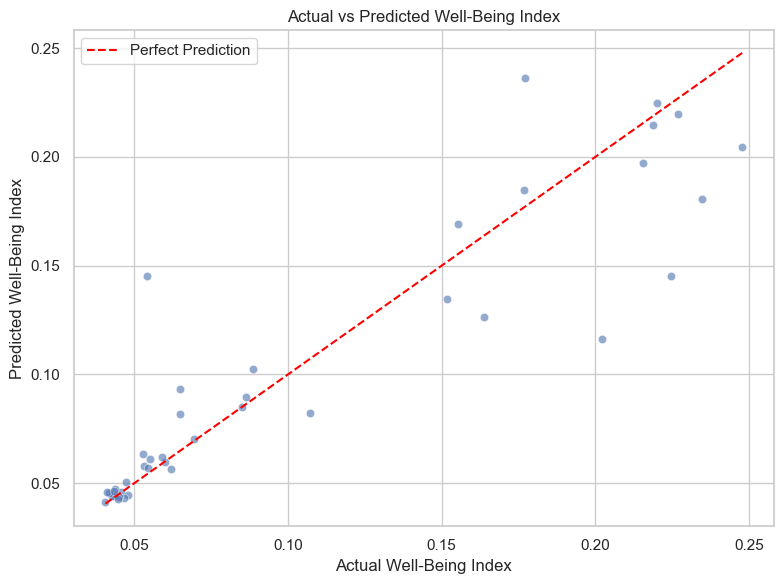

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the original training data
df = pd.read_csv('Data/Train_data.csv')

# True and predicted values from test set (as used earlier)
y_test_true = y_test  # Already defined earlier
y_test_pred = y_pred  # Already defined earlier

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_true, y=y_test_pred, alpha=0.6)

# Plot y=x line
plt.plot([y_test_true.min(), y_test_true.max()], 
         [y_test_true.min(), y_test_true.max()], 
         color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Well-Being Index')
plt.ylabel('Predicted Well-Being Index')
plt.title('Actual vs Predicted Well-Being Index')
plt.legend()
plt.tight_layout()

plt.show()



### Recommendations

#### 1. **Adopt Linear Regression for Deployment**

Despite being a simple model, **Linear Regression** achieved a strong **R² of 0.8450** and competitive RMSE, indicating it effectively captures the key relationships without overfitting. It is also more interpretable and computationally efficient than complex models like Random Forest.

> **Recommendation:** Use Linear Regression as the primary model for predicting future Well-Being Index values.

---

#### 2. **Focus Policy on Key Predictors**

Feature analysis revealed that well-being is most strongly influenced by:

* **Education Indicators** (expected and mean years of education)
* **Income Metrics** (GGP per capita, income index)
* **Life Expectancy**
* **Access to Infrastructure** (urban population %, sanitation access)

> **Recommendation:** Galaxies should invest in **education systems**, **healthcare access**, and **income growth** to drive sustainable improvements in well-being.

---

#### 3. **Prioritize Data Completeness for High-Impact Features**

Many top predictors had missing values that required imputation. This may introduce uncertainty into forecasts.

> **Recommendation:** Improve data collection on key features (e.g., education by gender, infrastructure access) to reduce reliance on imputation and enhance model reliability.

---

#### 4. **Retrain Periodically with New Data**

The model was trained on historical data up to the current year. As galactic dynamics evolve, relationships may shift.

> **Recommendation:** Retrain the model regularly with new annual data to maintain predictive accuracy and adapt to policy changes or emerging trends.
